In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import matpoltlib
#matpoltlib.rcParams['figure.figsize']=(20,10)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import lasso_path
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# PROBLEM STATEMENT

# EDA

In [227]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


<Figure size 720x720 with 0 Axes>

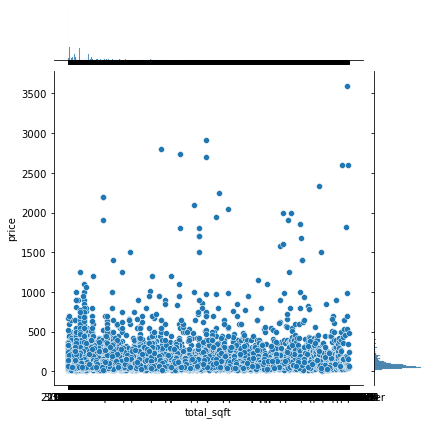

In [140]:
plt.figure(figsize=(10,10))
sns.jointplot(data=df,x='total_sqft',y='price')

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [229]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [230]:
df['area_type'].value_counts().to_dict()

{'Super built-up  Area': 8790,
 'Built-up  Area': 2418,
 'Plot  Area': 2025,
 'Carpet  Area': 87}

In [231]:
df['area_type'].replace({'Super built-up  Area': 1,'Built-up  Area': 2,'Plot  Area': 0,'Carpet  Area': 3},inplace=True)

In [232]:
df['area_type'].isnull().sum()

0

In [233]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [234]:
df['availability'].isnull().sum()

0

In [235]:
df['availability']

0               19-Dec
1        Ready To Move
2        Ready To Move
3        Ready To Move
4        Ready To Move
             ...      
13315    Ready To Move
13316    Ready To Move
13317    Ready To Move
13318           18-Jun
13319    Ready To Move
Name: availability, Length: 13320, dtype: object

In [236]:
df['location'].isnull().sum()

1

In [237]:
df['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [238]:
df['size'].isnull().sum()

16

In [239]:
df['BHK']=df['size'].apply(lambda x :int(x.split(' ')[0]))

AttributeError: 'float' object has no attribute 'split'

In [ ]:
df['size'].value_counts().to_dict()

In [240]:
df['size'].replace({'2 BHK': 2,
 '3 BHK': 3,
 '4 Bedroom': 4,
 '4 BHK': 4,
 '3 Bedroom': 3,
 '1 BHK': 1,
 '2 Bedroom': 2,
 '5 Bedroom': 5,
 '6 Bedroom': 6,
 '1 Bedroom': 1,
 '8 Bedroom': 8,
 '7 Bedroom': 7,
 '5 BHK': 5,
 '9 Bedroom': 9,
 '6 BHK': 6,
 '7 BHK': 7,
 '1 RK': 1,
 '10 Bedroom': 10,
 '9 BHK': 9,
 '8 BHK': 8,
 '11 BHK': 11,
 '11 Bedroom': 11,
 '10 BHK': 10,
 '14 BHK': 14,
 '13 BHK': 13,
 '12 Bedroom': 12,
 '27 BHK': 27,
 '43 Bedroom': 41,
 '16 BHK': 16,
 '19 BHK': 19,
 '18 Bedroom': 18},inplace=True)

In [241]:
df['size'].fillna(df['size'].mean(),inplace=True)

In [242]:
df['size'].isnull().sum()

0

<AxesSubplot:xlabel='size'>

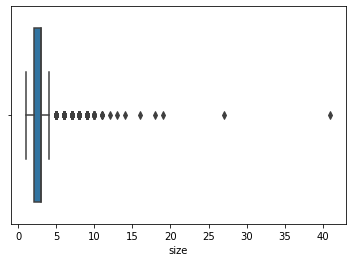

In [243]:
sns.boxplot(x=df['size'])

In [244]:
q1 = df['size'].quantile(0.25)
q2 = df['size'].quantile(0.75)
iqr = q2-q1
uh = q2 + 1.5*iqr
lh = q1 - 1.5*iqr
print(uh)
print(lh)

4.5
0.5


In [245]:
df.loc[df['size']>uh,'size'] = df.loc[df['size']>uh]['size'].median()

<AxesSubplot:xlabel='size'>

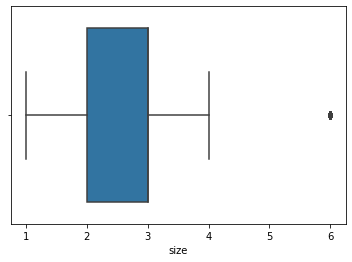

In [246]:
sns.boxplot(x=df['size'])

In [247]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [248]:
df['society'].isnull().sum()

5502

In [249]:
df['total_sqft'].isnull().sum()

0

In [250]:
obj=[]
def fun(x):
    for i in x:
        if i.isalpha():
            obj.append(x)
            break
    return x
df['total_sqft'].apply(fun)
print(obj)

['34.46Sq. Meter', '4125Perch', '1000Sq. Meter', '1100Sq. Yards', '5.31Acres', '30Acres', '716Sq. Meter', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards', '361.33Sq. Yards', '117Sq. Yards', '3040Sq. Meter', '500Sq. Yards', '167Sq. Meter', '315Sq. Yards', '3Cents', '188.89Sq. Yards', '204Sq. Meter', '45Sq. Yards', '133.3Sq. Yards', '78.03Sq. Meter', '122Sq. Yards', '84.53Sq. Meter', '2.09Acres', '24Guntha', '697Sq. Meter', '142.61Sq. Meter', '1500Cents', '132Sq. Yards', '2Acres', '1100Sq. Meter', '15Acres', '1.26Acres', '151.11Sq. Yards', '1Grounds', '2940Sq. Yards', '45.06Sq. Meter', '1.25Acres', '86.72Sq. Meter', '38Guntha', '6Acres', '120Sq. Yards', '24Sq. Meter', '142.84Sq. Meter', '300Sq. Yards']


In [251]:
def clean(x):
    rang=re.findall('\d+\s?[-]\s?\d+',x)
    if rang:
        val1=rang[0].split('-')
        a=int(val1[0])
        b=int(val1[1])
        mean=(a+b)/2
        return mean
    elif 'Sq. Meter'in x:
        clean_x=x.replace('Sq. Meter','')
        sq_ft=float(clean_x)*10.76
        return str(sq_ft)
    elif 'Perch' in x:
        clean_x=x.replace('Perch','')
        preach=float(clean_x)*272.25
        return str(preach)
    elif 'Sq. Yards' in x:
        clean_x=x.replace('Sq. Yards','')
        sq_yard=float(clean_x)*9
        return str(sq_yard)
    elif 'Acres' in x:
        clean_x=x.replace('Acres','')
        acers=float(clean_x)*43560
        return str(acers)
    elif 'Cents' in x:
        clean_x =x.replace('Cents','' )
        cents=float(clean_x)*435.60
        return str(cents)
    elif 'Guntha' in x:
        clean_x = x.replace('Guntha','')
        guntha = float(clean_x)*1089
        return str(guntha)
    elif 'Grounds' in x:
        clean_x = x.replace('Grounds','')
        ground = float(clean_x)*2400
        return str(ground)
    else:
        return x

In [252]:
df['colum_clean'] = df['total_sqft'].apply(clean)

In [253]:
df['column_clean1'] = df['colum_clean'].astype(float)

<AxesSubplot:xlabel='column_clean1'>

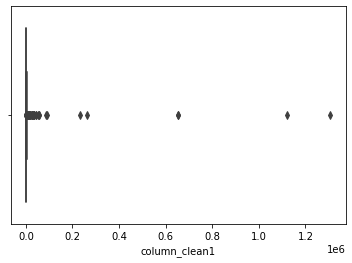

In [255]:
sns.boxplot(x=df['column_clean1'])

In [258]:
q1 = df['column_clean1'].quantile(0.25)
q2 = df['column_clean1'].quantile(0.75)
iqr = q2-q1
uh = q2 + 1.5*iqr
lh = q1 - 1.5*iqr
print(uh)
print(lh)

2550.0
230.0


In [259]:
df.loc[df['column_clean1']>uh,'column_clean1'] = df.loc[df['column_clean1']>uh]['column_clean1'].median()

<AxesSubplot:xlabel='column_clean1'>

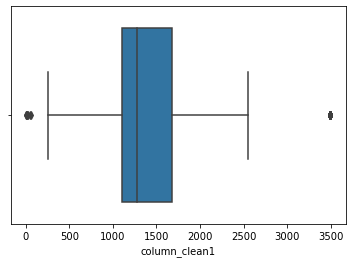

In [260]:
sns.boxplot(x=df['column_clean1'])

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  int64  
 1   availability   13320 non-null  object 
 2   location       13319 non-null  object 
 3   size           13320 non-null  float64
 4   society        7818 non-null   object 
 5   total_sqft     13320 non-null  object 
 6   bath           13247 non-null  float64
 7   balcony        12711 non-null  float64
 8   price          13320 non-null  float64
 9   colum_clean    13320 non-null  object 
 10  column_clean1  13320 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.1+ MB


In [262]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'colum_clean',
       'column_clean1'],
      dtype='object')

In [263]:
df['bath'].isna().sum()

73

In [264]:
df['bath'].fillna(df['bath'].mean(),inplace=True)

<AxesSubplot:xlabel='bath'>

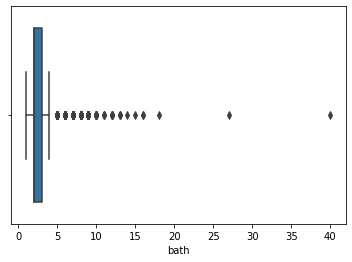

In [265]:
sns.boxplot(x=df['bath'])

In [266]:
q1 = df['bath'].quantile(0.25)
q2 = df['bath'].quantile(0.75)
iqr = q2-q1
uh = q2 + 1.5*iqr
lh = q1 - 1.5*iqr
print(uh)
print(lh)

4.5
0.5


In [267]:
df.loc[df['bath']>uh,'bath'] = df.loc[df['bath']>uh]['bath'].median()

<AxesSubplot:xlabel='bath'>

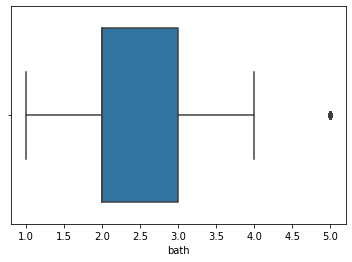

In [268]:
sns.boxplot(x=df['bath'])

In [269]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'colum_clean',
       'column_clean1'],
      dtype='object')

In [270]:
df['balcony'].isnull().sum()

609

In [271]:
df['balcony'].fillna(df['balcony'].mean(),inplace=True)

<AxesSubplot:xlabel='balcony'>

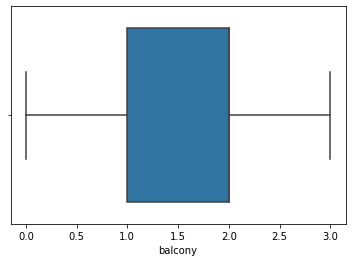

In [272]:
sns.boxplot(x=df['balcony'])

In [273]:
df['price'].isnull().sum()

0

<AxesSubplot:xlabel='price'>

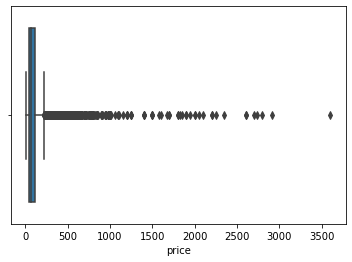

In [274]:
sns.boxplot(x=df['price'])

In [275]:
q1 = df['price'].quantile(0.25)
q2 = df['price'].quantile(0.75)
iqr = q2-q1
uh = q2 + 1.5*iqr
lh = q1 - 1.5*iqr
print(uh)
print(lh)

225.0
-55.0


In [276]:
df.loc[df['price']>uh,'price']= df.loc[df['price']>uh]['price'].median()

<AxesSubplot:xlabel='price'>

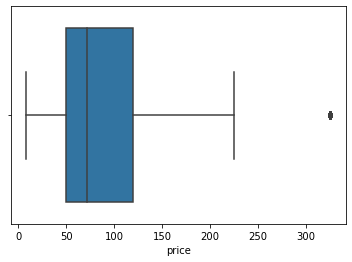

In [277]:
sns.boxplot(x=df['price'])

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  int64  
 1   availability   13320 non-null  object 
 2   location       13319 non-null  object 
 3   size           13320 non-null  float64
 4   society        7818 non-null   object 
 5   total_sqft     13320 non-null  object 
 6   bath           13320 non-null  float64
 7   balcony        13320 non-null  float64
 8   price          13320 non-null  float64
 9   colum_clean    13320 non-null  object 
 10  column_clean1  13320 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.1+ MB


In [279]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'colum_clean',
       'column_clean1'],
      dtype='object')

# ASSUMPTION

<AxesSubplot:>

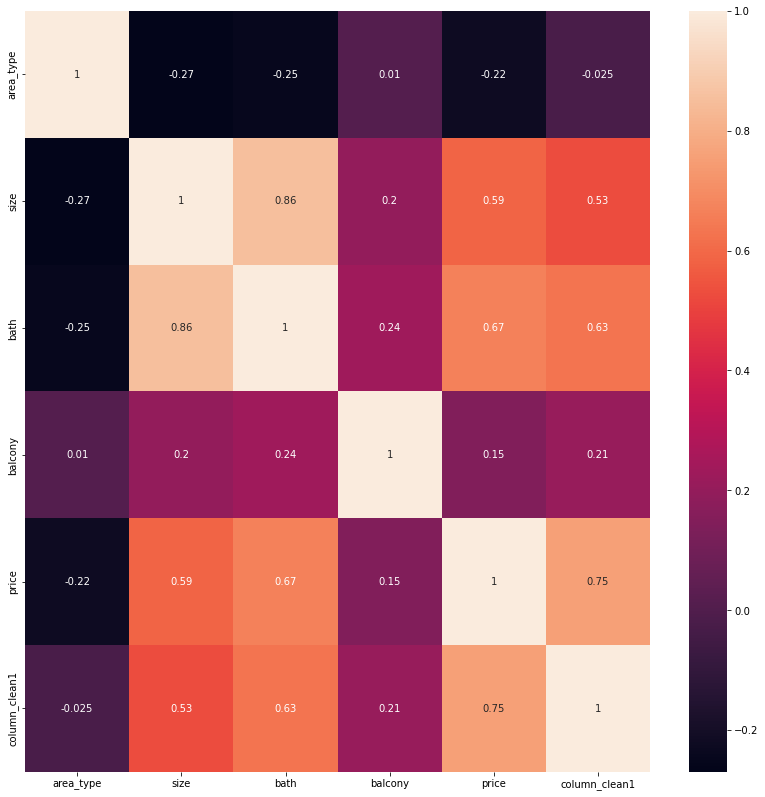

In [280]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True)

In [281]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

<Figure size 1008x1008 with 0 Axes>

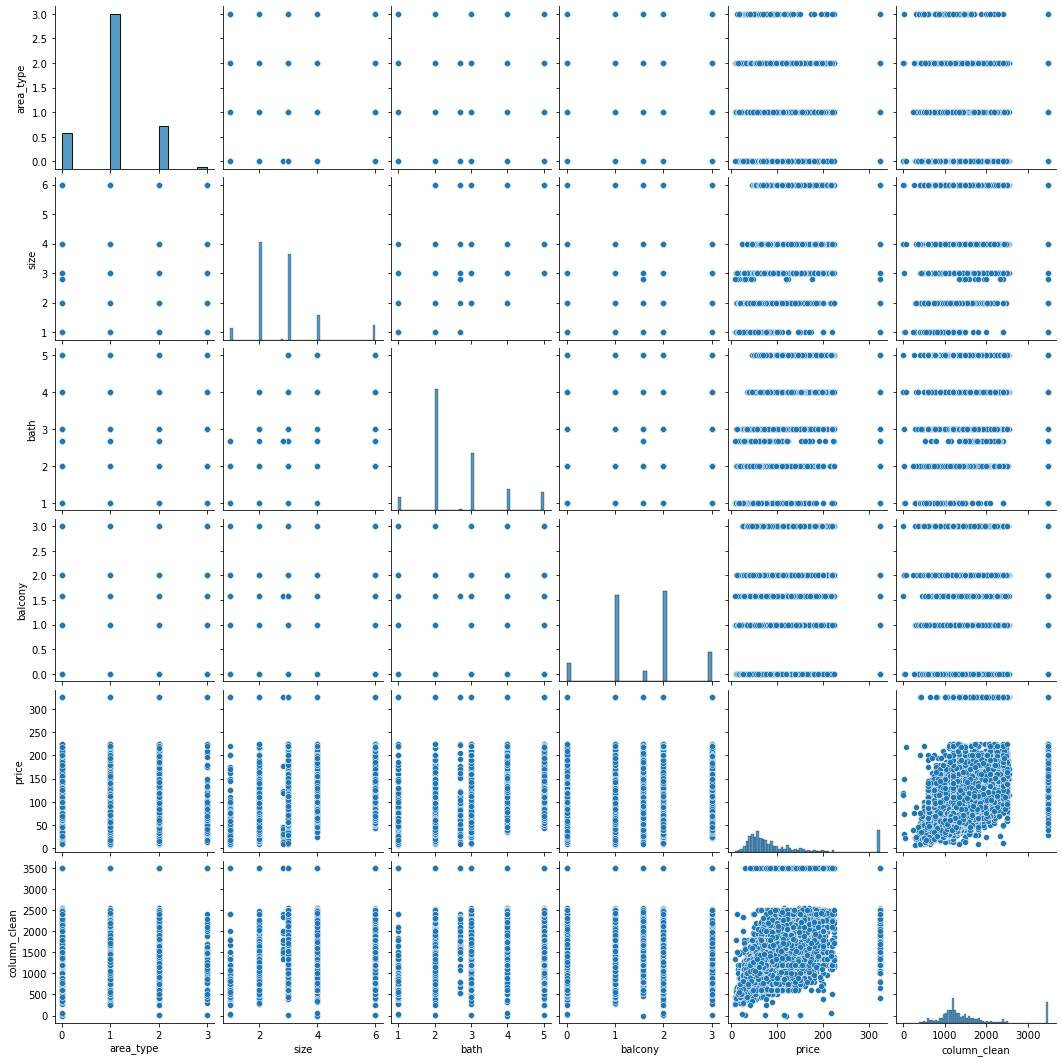

In [200]:
plt.figure(figsize=(14,14))
sns.pairplot(df)

In [282]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'colum_clean',
       'column_clean1'],
      dtype='object')

In [202]:
vif = pd.DataFrame()
df1= df.drop('price',axis = 1)
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(df1.shape[1])]
vif

TypeError: '>=' not supported between instances of 'str' and 'float'

# MODEL TRAIN

In [283]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'colum_clean',
       'column_clean1'],
      dtype='object')

In [284]:
x = df.drop(['availability','location','society','total_sqft','price'],axis = 1)


In [285]:
y=df['price']

In [286]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=12)

In [287]:
x_train

,area_type,size,bath,balcony,colum_clean,column_clean1
7231,2,1.0,1.0,0.0,450,450.0
10115,1,2.0,2.0,2.0,1230,1230.0
1075,1,2.0,2.0,3.0,1290,1290.0
13188,1,3.0,3.0,2.0,1700,1700.0
10056,1,3.0,3.0,3.0,1675,1675.0
...,...,...,...,...,...,...
3714,1,4.0,5.0,2.0,2940,3496.5
7409,1,2.0,2.0,2.0,1145,1145.0
3325,1,3.0,3.0,3.0,1586,1586.0
9606,1,2.0,2.0,1.0,1125,1125.0


In [288]:
y_train

7231      16.00
10115     44.00
1075      74.00
13188    111.00
10056     62.00
          ...  
3714     325.00
7409      46.00
3325      93.94
9606      54.80
5787      59.00
Name: price, Length: 9324, dtype: float64

In [289]:
x_test

,area_type,size,bath,balcony,colum_clean,column_clean1
3564,1,2.0,2.0,1.000000,1141,1141.00
1800,1,3.0,3.0,3.000000,1699,1699.00
745,2,2.0,2.0,0.000000,1100,1100.00
6279,0,2.0,2.0,2.000000,1200,1200.00
9469,1,3.0,2.0,3.000000,1475,1475.00
...,...,...,...,...,...,...
7130,0,2.0,2.0,0.000000,1500,1500.00
12271,1,3.0,2.0,1.584376,1321,1321.00
3533,1,2.0,2.0,1.000000,1205.47,1205.47
3933,2,2.0,2.0,1.000000,1130,1130.00


In [290]:
y_test

3564     44.40
1800     81.94
745      48.00
6279     46.13
9469     59.00
         ...  
7130     40.00
12271    40.00
3533     81.00
3933     32.63
12664    80.00
Name: price, Length: 3996, dtype: float64

In [291]:
model = LinearRegression()

In [292]:
linear_reg_model =LinearRegression()
linear_reg_model.fit(x_train,y_train)

LinearRegression()

In [293]:
model.fit(x_train,y_train)

LinearRegression()

In [294]:
model.coef_

array([-1.95586758e+01,  4.28658287e+00,  1.80799364e+01, -4.17782956e+00,
       -1.23858874e-04,  6.84568427e-02])

In [295]:
model.intercept_

-32.96969691336869

# evaluation

In [296]:
# traning

In [297]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [298]:
y_train_pred = model.predict(x_train)

In [299]:
from sklearn.linear_model import LinearRegression

In [300]:
mse = mean_squared_error(y_train,y_train_pred)
print('MSE>>',mse)
root_mean=np.sqrt(mse)
print('Root_Mean_Squared_Errors>>',root_mean)
r2 = r2_score(y_train,y_train_pred)
print('R2 score>>',r2)
adj_r2 = 1 - ((1-r2)*(len(x_train) - 1)/ (len(x_train)-len(x.columns) - 1))
print("Adjusted R2 value is :",adj_r2)

linear_reg_model.score(x_test,y_test)

MSE>> 2382.988330204187
Root_Mean_Squared_Errors>> 48.815861461252396
R2 score>> 0.6606025028970972
Adjusted R2 value is : 0.6603839363002724


0.617783060137605

In [301]:
# TESTING

In [302]:
y_test_pred = model.predict(x_test)

In [303]:
mse = mean_squared_error(y_test,y_test_pred)
print('MSE>>',mse)
root_mean=np.sqrt(mse)
print('Root_Mean_Squared_Errors>>',root_mean)
r2 = r2_score(y_test,y_test_pred)
print('R2 score>>',r2)
adj_r2 = 1 - ((1-r2)*(len(x_test) - 1)/ (len(x_test)-len(x.columns) - 1))
print("Adjusted R2 value is :",adj_r2)

linear_reg_model.score(x_test,y_test)

MSE>> 2597.4991226738393
Root_Mean_Squared_Errors>> 50.965666116257516
R2 score>> 0.617783060137605
Adjusted R2 value is : 0.6172081537352048


0.617783060137605

# Normality

In [304]:
error= y_train_pred - y_train

In [305]:
error

7231    -34.970686
10115    23.898577
1075     -6.179274
13188    11.381599
10056    54.495444
           ...    
3714    -39.342813
7409     16.090273
3325     16.473809
9606     10.101443
5787     38.517910
Name: price, Length: 9324, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

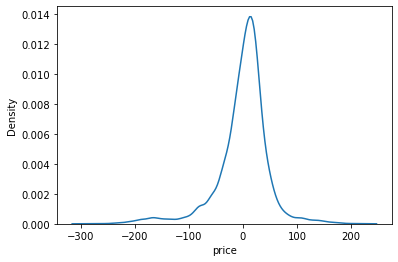

In [306]:
sns.kdeplot(error)

In [307]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,colum_clean,column_clean1
0,1,19-Dec,Electronic City Phase II,2.0,Coomee,1056,2.0,1.0,39.07,1056,1056.0
1,0,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600,5.0,3.0,120.00,2600,3496.5
2,2,Ready To Move,Uttarahalli,3.0,NaN,1440,2.0,3.0,62.00,1440,1440.0
3,1,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521,3.0,1.0,95.00,1521,1521.0
4,1,Ready To Move,Kothanur,2.0,NaN,1200,2.0,1.0,51.00,1200,1200.0


In [308]:
import statsmodels.api as sm
import scipy.stats as sts

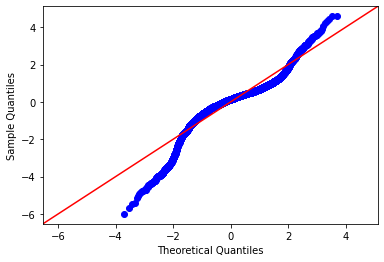

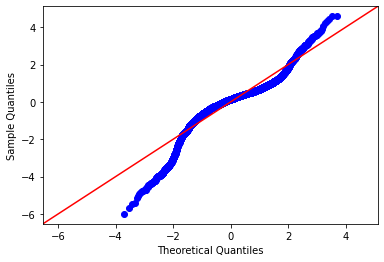

In [309]:
sm.qqplot(error,line = '45',dist = sts.norm, fit = True)

# Homoscadasity

<AxesSubplot:xlabel='price', ylabel='price'>

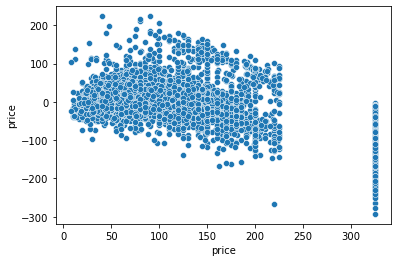

In [310]:
sns.scatterplot(y_train,error)

In [311]:
import pickle

In [136]:
pickle.dump(model, open("linear_model.pkl","wb"))